## Fourteen (14) different Nigerian Food categorization and recognition model.

The dataset used in this project is from https://www.kaggle.com/datasets/elinteerie/nigeria-food-ai-dataset

In [ ]:
# Unzip the data
import zipfile
zip_ref=zipfile.ZipFile("/content/drive/MyDrive/Nigeria Food AI/Nigeria Food AI.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
#Check the number of images in each folder
import os

# Walk through the data directory and list the number of files
for dirpath, dirnames, filenames in os.walk('Nigeria Food AI'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in Nigeria Food AI
There are 15 directories and 0 images in Nigeria Food AI/Test
There are 0 directories and 10 images in Nigeria Food AI/Test/bitterleaf
There are 0 directories and 10 images in Nigeria Food AI/Test/banga
There are 0 directories and 12 images in Nigeria Food AI/Test/ofeowerri
There are 0 directories and 125 images in Nigeria Food AI/Test/ogbono
There are 0 directories and 110 images in Nigeria Food AI/Test/egusi
There are 0 directories and 37 images in Nigeria Food AI/Test/akara_and_bread
There are 0 directories and 40 images in Nigeria Food AI/Test/puff_puff
There are 0 directories and 22 images in Nigeria Food AI/Test/edikang_ikong
There are 0 directories and 46 images in Nigeria Food AI/Test/moimoi
There are 0 directories and 20 images in Nigeria Food AI/Test/garri_and_groudnut
There are 0 directories and 11 images in Nigeria Food AI/Test/nkwobi
There are 0 directories and 91 images in Nigeria Food AI/Test/jollof_rice
There are 0

In [ ]:
# Define the train and test directories
train_dir = '/content/Nigeria Food AI/Train'
test_dir = '/content/Nigeria Food AI/Test'

In [ ]:
# Get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)
print(len(class_names))

['.ipynb_checkpoints' 'akara_and_bread' 'banga' 'bitterleaf'
 'edikang_ikong' 'egusi' 'ewedu' 'garri_and_groudnut' 'jollof_rice'
 'moimoi' 'nkwobi' 'ofeowerri' 'ogbono' 'okra' 'puff_puff']
15


In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # Setup the target directory
  target_folder = target_dir + '/' + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)

  # Read in the image and plot it using matplotlib
  img =mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  #Show the shape of the image
  print(f'image shape: {img.shape}')

  return img

image shape: (683, 1024, 3)


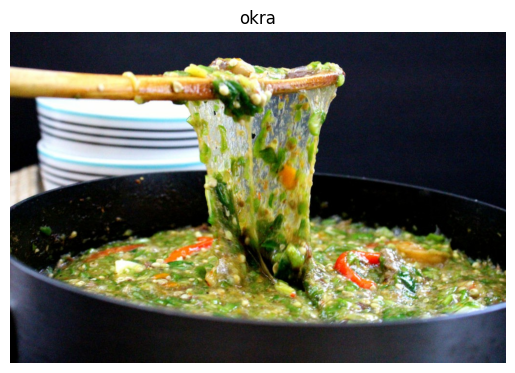

In [ ]:
image =view_random_image(train_dir,random.choice(class_names))

# Preprocess the data

In [ ]:
import tensorflow as tf

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                              image_size=(224,224),
                                                              batch_size=32,
                                                              label_mode='categorical')

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=(224,224),
                                                                batch_size=32,
                                                                label_mode='categorical',
                                                                shuffle=False)

Found 2748 files belonging to 14 classes.
Found 694 files belonging to 14 classes.


In [ ]:
# Create data augmentation layer to incorporate it right into the model
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

#Setup data augmentation
data_augmentation = Sequential([preprocessing.RandomFlip('horizontal'),
                                preprocessing.RandomRotation(0.2),
                                preprocessing.RandomHeight(0.2),
                                preprocessing.RandomWidth(0.2),
                                preprocessing.RandomZoom(0.2)])

# Build our model using tensorflow functional api

In [ ]:
# Setup the base model and freeze its layers
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=(224,224,3))

#Add in data augmentation sequential model as a layer
x = data_augmentation(inputs)

# Give base_model the inputs (after augmentation)
x = base_model(x, training=False)

# Pool output features of the base model
x=layers.GlobalAveragePooling2D()(x)

# Put a dense layer on as the output
outputs = layers.Dense(14, activation='softmax')(x)

# Make a model using the inputs and outputs
model_1 = tf.keras.Model(inputs,outputs)

# Compile the model
model_1.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

16705208/16705208 [==============================] - 0s 0us/step
Epoch 1/10
86/86 [==============================] - 76s 674ms/step - loss: 1.5864 - accuracy: 0.5368 - val_loss: 1.1339 - val_accuracy: 0.6801
Epoch 2/10
86/86 [==============================] - 43s 476ms/step - loss: 0.9670 - accuracy: 0.7180 - val_loss: 0.9084 - val_accuracy: 0.7305
Epoch 3/10
86/86 [==============================] - 41s 455ms/step - loss: 0.7804 - accuracy: 0.7646 - val_loss: 0.8207 - val_accuracy: 0.7579
Epoch 4/10
86/86 [==============================] - 37s 411ms/step - loss: 0.6789 - accuracy: 0.7933 - val_loss: 0.7822 - val_accuracy: 0.7594
Epoch 5/10
86/86 [==============================] - 36s 398ms/step - loss: 0.6273 - accuracy: 0.8097 - val_loss: 0.7373 - val_accuracy: 0.7738
Epoch 6/10
86/86 [==============================] - 36s 403ms/step - loss: 0.5666 - accuracy: 0.8315 - val_loss: 0.7138 - val_accuracy: 0.7752
Epoch 7/10
86/86 [==============================] - 39s 433ms/step - loss: 0.

In [ ]:
model_1.evaluate(test_data)

22/22 [==============================] - 6s 188ms/step - loss: 0.6866 - accuracy: 0.7767


[0.6865521669387817, 0.7766570448875427]

In [ ]:
# Create a function to view the curves
def plot_loss_curves(history):
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']

  epochs=range(len(loss))
  # Plot loss
  plt.plot(epochs,loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label='training_accuracy')
  plt.plot(epochs,val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

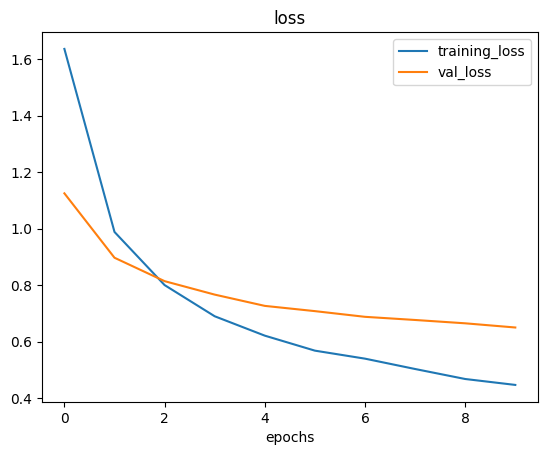

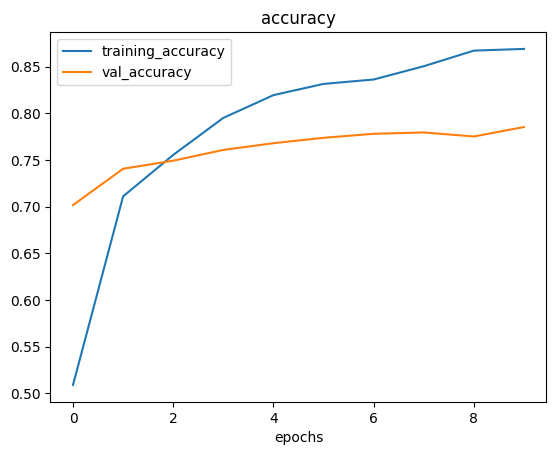

In [ ]:
plot_loss_curves(history_1)

In [ ]:
# Fine-tune our model
base_model.trainable = True

#Freeze all layers except the last 10
for layer in base_model.layers[:10]:
  layer.trainable = False

In [ ]:
# Recompile the model
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

# Fit the model
history_2 = model_1.fit(train_data,
                        epochs=15,
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        initial_epoch = history_1.epoch[-1])

Epoch 10/15
86/86 [==============================] - 155s 1s/step - loss: 0.4119 - accuracy: 0.8643 - val_loss: 0.6206 - val_accuracy: 0.7983
Epoch 11/15
86/86 [==============================] - 98s 1s/step - loss: 0.2660 - accuracy: 0.9181 - val_loss: 0.6490 - val_accuracy: 0.8112
Epoch 12/15
86/86 [==============================] - 84s 953ms/step - loss: 0.2016 - accuracy: 0.9363 - val_loss: 0.6425 - val_accuracy: 0.8084
Epoch 13/15
86/86 [==============================] - 80s 893ms/step - loss: 0.1497 - accuracy: 0.9498 - val_loss: 0.5934 - val_accuracy: 0.8473
Epoch 14/15
86/86 [==============================] - 76s 869ms/step - loss: 0.1061 - accuracy: 0.9647 - val_loss: 0.6788 - val_accuracy: 0.8228
Epoch 15/15
86/86 [==============================] - 79s 903ms/step - loss: 0.1057 - accuracy: 0.9618 - val_loss: 0.6075 - val_accuracy: 0.8674


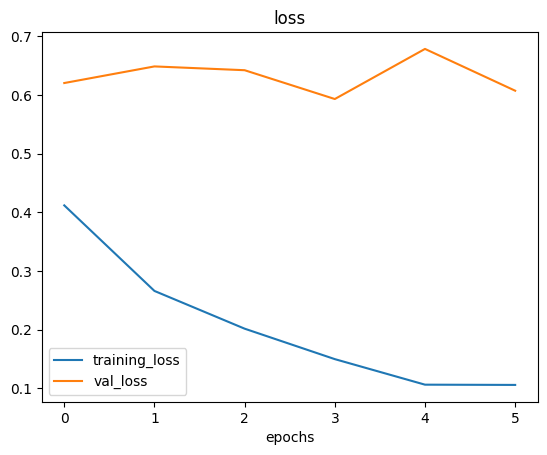

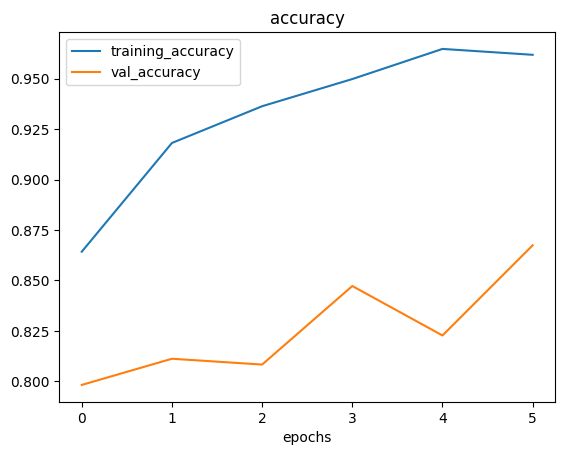

In [ ]:
plot_loss_curves(history_2)

In [ ]:
# Evaluate our model
model_1.evaluate(test_data)

22/22 [==============================] - 6s 181ms/step - loss: 0.6075 - accuracy: 0.8674


[0.6075273156166077, 0.8674351572990417]

In [ ]:
# Save our model
saved_model_1 = model_1.save('/content/drive/MyDrive/Nigeria Food model')

In [ ]:
# Load our model
model =tf.keras.models.load_model('/content/drive/MyDrive/Nigeria Food model')

In [ ]:
model.evaluate(test_data)

22/22 [==============================] - 8s 215ms/step - loss: 0.6075 - accuracy: 0.8674


[0.6075273156166077, 0.8674351572990417]

In [ ]:
# Make predictions with our model
preds = model.predict(test_data, verbose=1)

22/22 [==============================] - 9s 232ms/step


In [ ]:
preds[:10]

array([[7.67883565e-03, 1.32884039e-03, 2.85268507e-05, 2.31410057e-04,
        3.19094092e-01, 1.31019624e-03, 5.45293506e-06, 8.49128128e-07,
        6.11031661e-03, 3.31310366e-05, 4.28931162e-05, 5.55510342e-01,
        1.08548634e-01, 7.64451179e-05],
       [1.26237492e-08, 1.40370261e-07, 4.82057283e-10, 6.28147090e-10,
        5.56830355e-06, 1.22088807e-07, 7.24439886e-09, 9.99989510e-01,
        2.85951569e-06, 1.32465698e-06, 1.94120844e-10, 2.48040720e-07,
        2.98279836e-08, 1.67487855e-07],
       [3.48180651e-11, 9.21468090e-05, 8.42934533e-04, 7.28885061e-04,
        9.97097611e-01, 4.63098900e-11, 2.57167557e-07, 6.15212628e-07,
        1.55059035e-10, 1.38022234e-08, 2.06962097e-04, 3.15902912e-06,
        1.02751784e-03, 9.70895919e-10],
       [3.54299368e-10, 2.51046515e-07, 5.39146470e-07, 5.52544557e-03,
        1.78482207e-09, 2.76623641e-10, 9.62499636e-10, 1.43421612e-05,
        1.23926566e-06, 2.73487289e-02, 2.07818564e-04, 1.54897134e-04,
        9.667

In [ ]:
#Get the pred classes of each label
pred_classes =preds.argmax(axis=1)

pred_classes[:10]

array([ 0,  0, 13,  0,  0,  0,  0,  0,  8,  0])

In [ ]:
# Get our test labels
y_labels=[]

for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())

y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## Evaluate our models predictions

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_labels,pred_classes))

              precision    recall  f1-score   support

           0       0.07      0.05      0.06        37
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        10
           3       0.04      0.05      0.04        22
           4       0.19      0.16      0.17       110
           5       0.09      0.10      0.10        50
           6       0.05      0.05      0.05        20
           7       0.12      0.11      0.11        91
           8       0.07      0.07      0.07        46
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00        12
          11       0.19      0.21      0.20       125
          12       0.12      0.14      0.13       110
          13       0.02      0.03      0.02        40

    accuracy                           0.12       694
   macro avg       0.07      0.07      0.07       694
weighted avg       0.12      0.12      0.12       694



In [ ]:
# Create a function to load and prepare images
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  specified shape (img_shape, img_shape, color_channels=3).

  Args:
  filename (str): path to target image
  image_shape (int): height/width dimension of target image size
  scale (bool): scale pixel values from 0-255 to 0-1 or not

  Returns:
  Image tensor of shape (img_shape, img_shape, 3)
  """

  # Read in the image
  img = tf.io.read_file(filename)

  # Decode image into tensor
  img = tf.io.decode_image(img, channels=3)

  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])

  # Scale? Yes/no
  if scale:
    #rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img


In [ ]:
# Get a list of class_names
class_names = test_data.class_names
class_names[:14]

['akara_and_bread',
 'banga',
 'bitterleaf',
 'edikang_ikong',
 'egusi',
 'ewedu',
 'garri_and_groudnut',
 'jollof_rice',
 'moimoi',
 'nkwobi',
 'ofeowerri',
 'ogbono',
 'okra',
 'puff_puff']

1/1 [==============================] - 0s 40ms/step


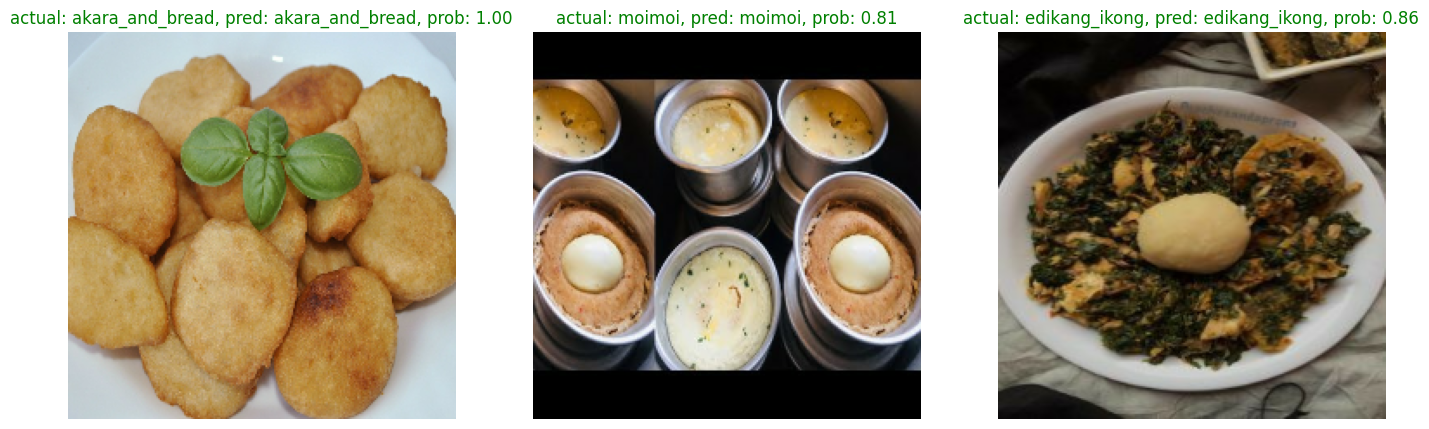

In [ ]:
# Make preds on a series of random images
import os
import random

plt.figure(figsize=(17, 10))
for i in range(3):
  #choose a random image from a random class
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath=test_dir + '/' + class_name + "/" + filename
  # print(filepath)

  #Load the image and make predictions

  img = load_and_prep_image(filepath, scale=False)
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) #get prediction probabilities array
  pred_class = class_names[pred_prob.argmax()] #get highest prediction probability index

  # plot the images(s)
  plt.subplot(1,3,i+1)
  plt.imshow(img/255.)
  if class_name == pred_class:
    title_color='g'
  else:
    title_color='r'
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);